In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("creditcard.csv")

if 'Hour' not in df.columns:
    df['Hour'] = (df['Time'] / 3600) % 24

# Drop unnecessary columns 
df = df.drop(columns=['Time'])

print(" Dataset loaded and ready for modeling.")
print("Shape:", df.shape)


 Dataset loaded and ready for modeling.
Shape: (284807, 31)


# Feature Engineering 

In [3]:
# Transaction amount to mean ratio 
df['Amount_to_mean_ratio'] = df['Amount'] / df['Amount'].mean()

# Normalized transaction hour 
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Drop original Hour 
df.drop(columns=['Hour'], inplace=True)

print(" Feature engineering completed.")
df.head()


 Feature engineering completed.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_to_mean_ratio,Hour_sin,Hour_cos
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.693499,0.000000,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.030447,0.000000,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.285927,0.000073,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.397855,0.000073,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.792194,0.000145,1.0


# Define Features and Target Values

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))


Feature matrix shape: (284807, 32)
Target distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


# Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Train-test split complete.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


 Train-test split complete.
Training set shape: (227845, 32)
Testing set shape: (56962, 32)


# Features Scaling 

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features standardized using StandardScaler.")


 Features standardized using StandardScaler.


In [7]:
# Handle class imbalance (Using SMOTE)

# Apply synthetic minority oversampling technique
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("SMOTE applied successfully.")
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


SMOTE applied successfully.
Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [8]:
# Baseline model (Using logistic regression)
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

print(" Baseline Logistic Regression model trained.")


 Baseline Logistic Regression model trained.



 Classification Report:

              precision    recall  f1-score   support

           0     0.9999    0.9737    0.9866     56864
           1     0.0568    0.9184    0.1070        98

    accuracy                         0.9736     56962
   macro avg     0.5283    0.9460    0.5468     56962
weighted avg     0.9982    0.9736    0.9851     56962



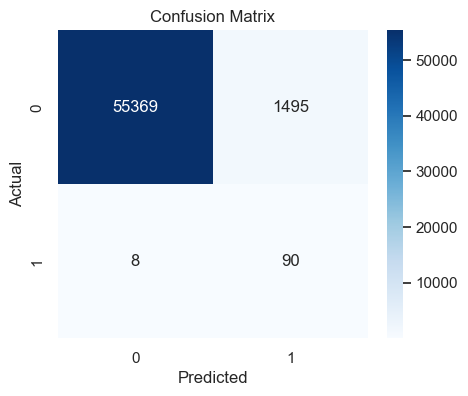

ROC-AUC Score: 0.9727


In [9]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

# Classification report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


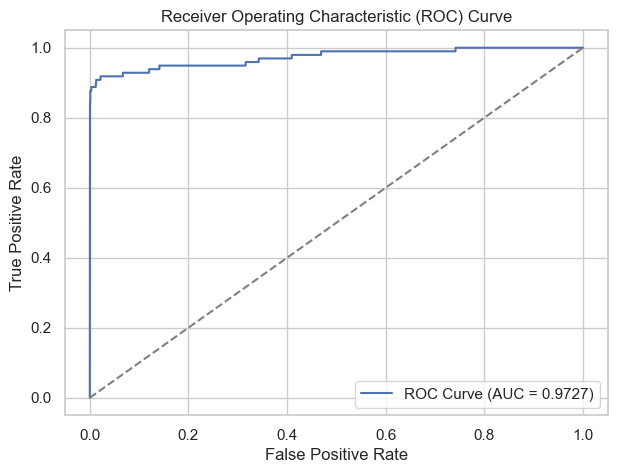

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


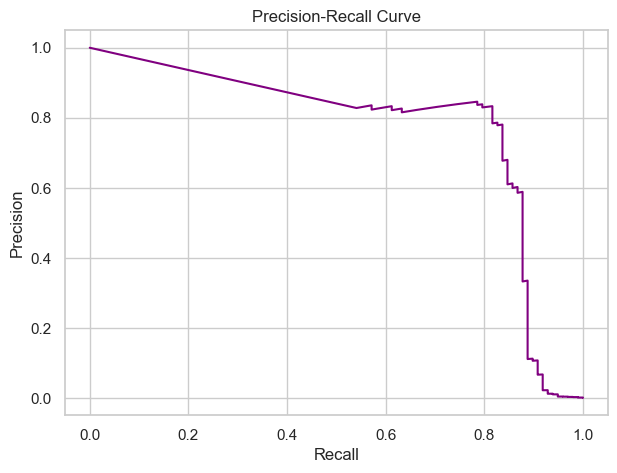

In [11]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


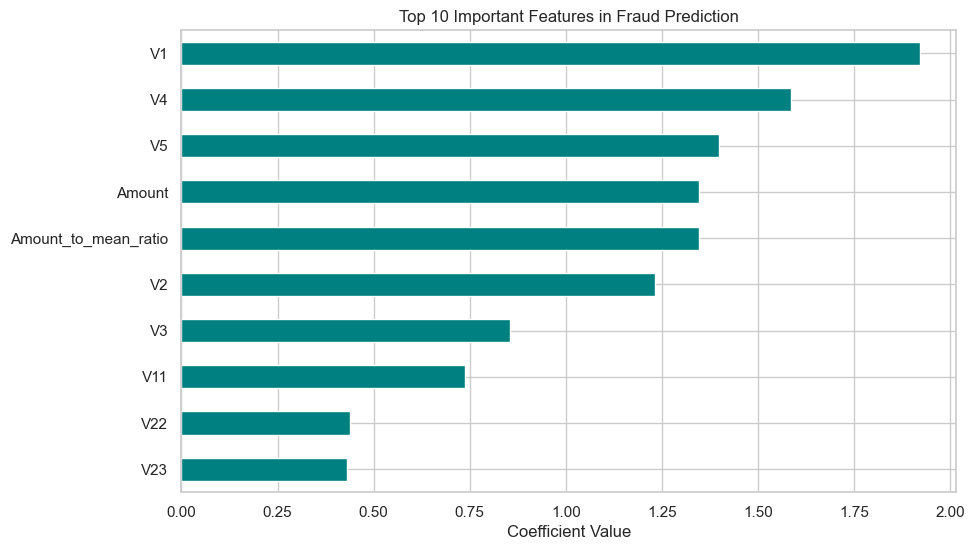


Top Predictors of Fraud:


V1                      1.920099
V4                      1.585429
V5                      1.398789
Amount                  1.347133
Amount_to_mean_ratio    1.347133
V2                      1.232968
V3                      0.855388
V11                     0.737890
V22                     0.439256
V23                     0.430527
dtype: float64

In [12]:
# Get feature importance (coefficients)
importance = pd.Series(model.coef_[0], index=X.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importance[:10].plot(kind='barh', color='teal')
plt.title("Top 10 Important Features in Fraud Prediction")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

print("\nTop Predictors of Fraud:")
display(importance.head(10))
